# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Два и более высших образования', 'Среднее', 'Среднее специальное', 'Неполное среднее', 'Ученая степень', 'Неоконченное высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Разведен(а)', 'Не состоял в браке', 'Вдовец/Вдова', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Энергетика', 'Транспорт', 'Информационные технологии', 'Здравоохранение', 'Банк/Финансы', 'Другие сферы', 'Нефтегазовая промышленность', 'Государственная служба', 'Недвижимость', 'Подбор персонала', 'Информационные услуги', 'Страхование', 'Туризм', 'Сборочные производства', 'Коммунальное хоз-во/Дорожные службы', 'Развлечения/Искусство', 'Ресторанный бизнес/Общественное питание', 'Химия/Парфюмерия/Фармацевтика', 'Управляющая компания', 'Сельское хозяйство', 'Салоны красоты и здоровья', 'Маркетинг', 'СМИ/Реклама/PR-агенства', 'Образование', 'Юридические услуги/нотариальные услуги', 'Строительство', 'ЧОП/Детективная д-ть', 'Наука', 'Металлургия/Промышленность/Машиностроение', 'Торговля', 'Логистика'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [16]:
tmp = df[['GEN_TITLE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GEN_INDUSTRY', 
          'ORG_TP_STATE','ORG_TP_FCAPITAL', 'JOB_DIR', 'WORK_TIME', 'AGE']]
tmp[tmp['GEN_TITLE'].isnull()].T #смотрим пропуски

,1,5,8,12,20,28,30,57,77,96,...,30082,30085,30087,30088,30091,30095,30101,30106,30107,30131
GEN_TITLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOCSTATUS_WORK_FL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SOCSTATUS_PENS_FL,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GEN_INDUSTRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORG_TP_STATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORG_TP_FCAPITAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB_DIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WORK_TIME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,48,44,53,59,65,63,63,62,58,66,...,59,63,58,63,58,55,64,64,61,60


Пропуски (Отрасль, Должность, Форма собственности и направление деятельности) сопадают.  

In [17]:
#Пропуски в основном у неработающих пенсионеров
df[(df['SOCSTATUS_PENS_FL'] == 1) & (df['SOCSTATUS_WORK_FL'] == 0)].count()

AGREEMENT_RK                  2738
TARGET                        2738
AGE                           2738
SOCSTATUS_WORK_FL             2738
SOCSTATUS_PENS_FL             2738
GENDER                        2738
CHILD_TOTAL                   2738
DEPENDANTS                    2738
EDUCATION                     2738
MARITAL_STATUS                2738
GEN_INDUSTRY                    26
GEN_TITLE                       26
ORG_TP_STATE                    26
ORG_TP_FCAPITAL                 31
JOB_DIR                         26
FAMILY_INCOME                 2738
PERSONAL_INCOME               2738
REG_ADDRESS_PROVINCE          2738
FACT_ADDRESS_PROVINCE         2738
POSTAL_ADDRESS_PROVINCE       2738
TP_PROVINCE                   2722
REGION_NM                     2738
REG_FACT_FL                   2738
FACT_POST_FL                  2738
REG_POST_FL                   2738
REG_FACT_POST_FL              2738
REG_FACT_POST_TP_FL           2738
FL_PRESENCE_FL                2738
OWN_AUTO            

Прослеживается закономерность пропусков зависящих от статуса работает/не работает и пенсионер/не пенсионер. 
У не работающих этих значений быть не должно.

Если удалять записи с пропусками, то будет утеряно порядка 9% данных причем характеризующих практически целый класс заемщиков (2713 к 30131). 

В этом случае целесообразней заменить пропуски на дополнительное строковое значение, например: 'Нет'. 

Отношение к иностранному капиталу так же зависит от статуса 'работает' или 'пенсионер', но есть 5 значений которые определены при (Отрасль, Должность, Форма собственности и направление деятельности) = Nan

In [18]:
tmp = df[['GEN_TITLE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GEN_INDUSTRY', 
          'ORG_TP_STATE','ORG_TP_FCAPITAL', 'JOB_DIR', 'WORK_TIME', 'AGE']]

#Проверяю возможные варианты значения ORG_TP_FCAPITAL если заемщик не работает - пенсионер
tmp[(tmp['SOCSTATUS_WORK_FL'] == 0) & (tmp['SOCSTATUS_PENS_FL'] == 1) & (~tmp['ORG_TP_FCAPITAL'].isnull())]

,GEN_TITLE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GEN_INDUSTRY,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,WORK_TIME,AGE
396,Рабочий,0,1,Государственная служба,Государственная комп./учреж.,Без участия,Вспомогательный техперсонал,12.0,61
1102,Служащий,0,1,Образование,Государственная комп./учреж.,Без участия,Вспомогательный техперсонал,12.0,54
1802,Рабочий,0,1,Металлургия/Промышленность/Машиностроение,Частная компания,Без участия,Участие в основ. деятельности,444.0,56
2960,NaN,0,1,NaN,NaN,Без участия,NaN,NaN,57
2989,Служащий,0,1,Здравоохранение,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,3.0,64
3149,Специалист,0,1,Наука,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,NaN,59
8361,Рабочий,0,1,Торговля,Частная компания,Без участия,Участие в основ. деятельности,24.0,57
8617,Рабочий,0,1,Строительство,Частная компания,Без участия,Снабжение и сбыт,48.0,60
9382,Специалист,0,1,Торговля,Частная компания,Без участия,Участие в основ. деятельности,NaN,56
9386,Специалист,0,1,Коммунальное хоз-во/Дорожные службы,Частная компания,Без участия,Снабжение и сбыт,90.0,34


Логично что пенсионер без работы (без организации) вообще не может иметь этого статуса, заполняем пропуски уже существующим в выборке значением 'Без участия'. 

In [19]:
#Исследуем пропуски TP_PROVINCE - область торговой точки, где клиент брал последний кредит
temp = df
temp = temp[['TP_PROVINCE', 'REG_FACT_POST_TP_FL' , 'REGION_NM',  'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 
             'REG_ADDRESS_PROVINCE', 'CREDIT', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED' ]]

temp[temp['TP_PROVINCE'].isnull()]

,TP_PROVINCE,REG_FACT_POST_TP_FL,REGION_NM,POSTAL_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,REG_ADDRESS_PROVINCE,CREDIT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
40,NaN,0,ЦЕНТРАЛЬНЫЙ ОФИС,Московская область,Московская область,Московская область,12941,1,1
67,NaN,0,ЦЕНТРАЛЬНЫЙ ОФИС,Московская область,Московская область,Московская область,8630,1,1
120,NaN,0,ЦЕНТРАЛЬНЫЙ ОФИС,Московская область,Московская область,Московская область,7061,1,1
282,NaN,0,ЦЕНТРАЛЬНЫЙ ОФИС,Московская область,Московская область,Московская область,25490,1,1
315,NaN,0,ЦЕНТРАЛЬНЫЙ ОФИС,Московская область,Московская область,Московская область,17161,1,0
336,NaN,0,ЦЕНТРАЛЬНЫЙ ОФИС,Московская область,Московская область,Московская область,17990,1,0
534,NaN,0,ЦЕНТРАЛЬНЫЙ ОФИС,Московская область,Московская область,Московская область,21590,1,0
537,NaN,0,ЦЕНТРАЛЬНЫЙ ОФИС,Москва,Москва,Москва,"17581,86",1,0
609,NaN,0,ЦЕНТРАЛЬНЫЙ ОФИС,Москва,Москва,Москва,36680,1,0
664,NaN,0,ЦЕНТРАЛЬНЫЙ ОФИС,Московская область,Московская область,Московская область,"23595,97",1,1


In [20]:
#посмотрим все значения REGION_NM при TP_PROVINCE = Nan
set(temp['REGION_NM'][temp['TP_PROVINCE'].isnull()])

{'УРАЛЬСКИЙ', 'ЦЕНТРАЛЬНЫЙ ОФИС'}

In [21]:
#посмотрим где находиться 'ЦЕНТРАЛЬНЫЙ ОФИС' из полных записей
set(temp['TP_PROVINCE'][(temp['REGION_NM'] == 'ЦЕНТРАЛЬНЫЙ ОФИС') & 
                         (~temp['TP_PROVINCE'].isnull())])

{'Москва'}

В итоге при условии REGION_NM == 'ЦЕНТРАЛЬНЫЙ ОФИС' значения только Москва.
Пропуски TP_PROVINCE заполняем значением 'Москва' при условии REGION_NM == 'ЦЕНТРАЛЬНЫЙ ОФИС'

In [22]:
#меняем TP_PROVINCE=Nan при REGION_NM='ЦЕНТРАЛЬНЫЙ ОФИС' на  'Москва' 

#temp.loc[((temp.REGION_NM == 'ЦЕНТРАЛЬНЫЙ ОФИС') & (temp.TP_PROVINCE.isnull())), 'TP_PROVINCE'] = 'Москва'

temp[((temp.REGION_NM != 'ЦЕНТРАЛЬНЫЙ ОФИС') & (temp.TP_PROVINCE.isnull()))].count()

TP_PROVINCE                 0
REG_FACT_POST_TP_FL        46
REGION_NM                  46
POSTAL_ADDRESS_PROVINCE    46
FACT_ADDRESS_PROVINCE      46
REG_ADDRESS_PROVINCE       46
CREDIT                     46
LOAN_NUM_TOTAL             46
LOAN_NUM_CLOSED            46
dtype: int64

In [23]:
#посмотрим где находиться 'УРАЛЬСКИЙ' офисы из заполненных записей
List_TP_PROVINCE = set( temp['TP_PROVINCE'][(temp['REGION_NM'] == 'УРАЛЬСКИЙ') & 
                         (~temp['TP_PROVINCE'].isnull())]
                      )
List_TP_PROVINCE

{'Курганская область',
 'Свердловская область',
 'Тюменская область',
 'Ханты-Мансийский АО',
 'Челябинская область'}

In [24]:
temp[((temp.REGION_NM == 'УРАЛЬСКИЙ')  & (temp.TP_PROVINCE.isnull()))].T

,5331,5468,6454,6460,6552,6623,6655,7101,7155,7172,...,22045,22413,22722,22747,22864,22893,22958,23048,24426,28794
TP_PROVINCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REG_FACT_POST_TP_FL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
REGION_NM,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,...,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ,УРАЛЬСКИЙ
POSTAL_ADDRESS_PROVINCE,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,...,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область
FACT_ADDRESS_PROVINCE,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,...,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область
REG_ADDRESS_PROVINCE,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,...,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область,Тюменская область
CREDIT,6200,3000,26980,"2707,2",36082,7578,15292,"3099,9","37280,9",15283,...,11710,3951,16199,50700,"7022,7",34449,"3128,2","9655,2",21300,12000
LOAN_NUM_TOTAL,1,1,1,1,1,1,1,1,3,1,...,1,1,1,1,1,1,1,2,1,2
LOAN_NUM_CLOSED,1,1,0,1,0,0,0,1,2,1,...,0,0,0,0,0,0,0,2,0,2


In [25]:
#Проверяем в каких других, кроме своего, регионах люди с одинаковыми адресами (почтовый, фактически и регистрация) 
#чаще берут кредит

#проверим возможные значения когда все адреса соответсвуют 'Тюменская область' и 'Ханты-Мансийский АО'  
# но REG_FACT_POST_TP_FL = 0
region = 'Тюменская область'
print('Из', region, 'чаще берут кредит (если не в своем регионе) в:')
temp[(temp.REGION_NM == 'УРАЛЬСКИЙ') &
     (temp.POSTAL_ADDRESS_PROVINCE == region) &
     (temp.FACT_ADDRESS_PROVINCE == region) &
     (temp.REG_ADDRESS_PROVINCE == region) & 
     (temp.REG_FACT_POST_TP_FL == 0) &
     (~temp.TP_PROVINCE.isnull())].groupby('TP_PROVINCE').count()



Из Тюменская область чаще берут кредит (если не в своем регионе) в:


,REG_FACT_POST_TP_FL,REGION_NM,POSTAL_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,REG_ADDRESS_PROVINCE,CREDIT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
TP_PROVINCE,,,,,,,,
Курганская область,2,2,2,2,2,2,2,2
Ханты-Мансийский АО,74,74,74,74,74,74,74,74


In [26]:
region = 'Ханты-Мансийский АО'

print('Из', region, 'чаще берут кредит (если не в своем регионе) в:')
temp[(temp.REGION_NM == 'УРАЛЬСКИЙ') &
     (temp.POSTAL_ADDRESS_PROVINCE == region) &
     (temp.FACT_ADDRESS_PROVINCE == region) &
     (temp.REG_ADDRESS_PROVINCE == region) & 
     (temp.REG_FACT_POST_TP_FL == 0) &
     (~temp.TP_PROVINCE.isnull())].groupby('TP_PROVINCE').count()


Из Ханты-Мансийский АО чаще берут кредит (если не в своем регионе) в:


,REG_FACT_POST_TP_FL,REGION_NM,POSTAL_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,REG_ADDRESS_PROVINCE,CREDIT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
TP_PROVINCE,,,,,,,,
Тюменская область,14,14,14,14,14,14,14,14


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [28]:
df[df['REGION_NM'].isnull()].T

,3099,17420
AGREEMENT_RK,61448233,61293307
TARGET,0,0
AGE,54,64
SOCSTATUS_WORK_FL,1,1
SOCSTATUS_PENS_FL,0,0
GENDER,1,1
CHILD_TOTAL,2,1
DEPENDANTS,0,0
EDUCATION,Среднее специальное,Среднее специальное
MARITAL_STATUS,Состою в браке,Разведен(а)


In [29]:
#ищем регион под Новосибирскую область

set(df['REGION_NM'][(~df.REGION_NM.isnull()) & (df.REG_ADDRESS_PROVINCE == 'Новосибирская область')])

{'ЗАПАДНО-СИБИРСКИЙ'}

Видимо случайные пропуски. Не заполненным REGION_NM присваиваем значение 'ЗАПАДНО-СИБИРСКИЙ'

In [30]:
# смотрим WORK_TIME  
# у пенсионеров это значение 0, так же могут попасться те кто еще не работает - студенты

df[df.WORK_TIME.isnull()].T

,1,5,8,12,20,28,30,57,77,96,...,30082,30085,30087,30088,30091,30095,30101,30106,30107,30131
AGREEMENT_RK,59910420,59911769,59912422,59912574,59913432,59914189,59914517,59918446,59920591,59923652,...,75285843,75285983,75286543,75286652,75287450,75287816,75288307,75288884,75288922,75291960
TARGET,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGE,48,44,53,59,65,63,63,62,58,66,...,59,63,58,63,58,55,64,64,61,60
SOCSTATUS_WORK_FL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SOCSTATUS_PENS_FL,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GENDER,1,0,1,1,1,0,1,1,1,1,...,1,1,0,1,0,0,0,1,1,1
CHILD_TOTAL,0,2,2,0,2,0,2,0,2,0,...,0,0,1,3,2,0,0,0,0,2
DEPENDANTS,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EDUCATION,Среднее,Среднее специальное,Среднее специальное,Неполное среднее,Среднее специальное,Среднее специальное,Среднее специальное,Среднее специальное,Среднее специальное,Неполное среднее,...,Среднее специальное,Неполное среднее,Неполное среднее,Среднее,Среднее,Высшее,Высшее,Среднее,Среднее специальное,Среднее
MARITAL_STATUS,Состою в браке,Состою в браке,Состою в браке,Не состоял в браке,Разведен(а),Состою в браке,Не состоял в браке,Состою в браке,Вдовец/Вдова,Состою в браке,...,Состою в браке,Состою в браке,Состою в браке,Разведен(а),Состою в браке,Состою в браке,Состою в браке,Вдовец/Вдова,Вдовец/Вдова,Вдовец/Вдова


In [31]:
temp = df[['WORK_TIME', 'SOCSTATUS_PENS_FL']]

temp['WORK_TIME'].isnull().sum() #количество пропусков

2717

In [32]:
temp['SOCSTATUS_PENS_FL'][temp.WORK_TIME.isnull()].sum()

2716

По статусу 'пенсионер' угадали, кроме одного значения. Значить WORK_TIME = 0.

In [33]:
#смотрим оставшееся значение
df[(df.WORK_TIME.isnull()) & (df.SOCSTATUS_PENS_FL == 0)].T

,22873
AGREEMENT_RK,64469089
TARGET,0
AGE,24
SOCSTATUS_WORK_FL,1
SOCSTATUS_PENS_FL,0
GENDER,0
CHILD_TOTAL,0
DEPENDANTS,0
EDUCATION,Среднее специальное
MARITAL_STATUS,Не состоял в браке


In [34]:
#какие значения у лиц возраста = 24 
df[(~df.WORK_TIME.isnull()) & (df.AGE == 24)].T

,89,169,201,209,245,262,271,285,330,337,...,29727,29730,29753,29819,29871,29875,29955,29970,30003,30034
AGREEMENT_RK,59922145,59931978,59936302,59936919,59939921,59961184,59962462,59964007,59969448,59970974,...,75004974,75005315,75015404,75026462,75034571,75034835,75206133,75209420,75272751,75278008
TARGET,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
AGE,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
SOCSTATUS_WORK_FL,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
SOCSTATUS_PENS_FL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GENDER,0,0,0,1,0,0,1,0,0,1,...,1,1,0,1,0,0,1,1,1,0
CHILD_TOTAL,0,0,0,0,0,0,2,0,0,1,...,0,1,0,0,0,0,0,1,1,1
DEPENDANTS,0,0,0,0,0,0,2,0,0,1,...,0,1,0,0,0,0,0,1,1,1
EDUCATION,Среднее специальное,Среднее специальное,Среднее,Среднее специальное,Неоконченное высшее,Среднее специальное,Среднее специальное,Среднее,Среднее,Среднее специальное,...,Среднее специальное,Среднее специальное,Среднее,Среднее специальное,Высшее,Высшее,Высшее,Среднее,Высшее,Среднее специальное
MARITAL_STATUS,Не состоял в браке,Не состоял в браке,Не состоял в браке,Состою в браке,Не состоял в браке,Состою в браке,Состою в браке,Не состоял в браке,Разведен(а),Состою в браке,...,Не состоял в браке,Состою в браке,Состою в браке,Не состоял в браке,Разведен(а),Не состоял в браке,Не состоял в браке,Состою в браке,Состою в браке,Состою в браке


Судя по всему это единственный случай в выборке. Возможно некорректно оформлено, у заемщика статус работает при этом ни должности ни организации не указано. Будем считать WORK_TIME = 0 (только устроился)

Не заполненные WORK_TIME заполняем 0 

##### В итоге пропуски в переменных заполняем следующим образом:
    PREVIOUS_CARD_NUM_UTILIZED = 0
    GEN_INDUSTRY, 
    GEN_TITLE, 
    ORG_TP_STATE, 
    ORG_TP_FCAPITAL, 
    JOB_DIR      = 'Нет'
    ORG_TP_FCAPITAL = 'Без участия'
    TP_PROVINCE = 'Москва' при условии REGION_NM == 'ЦЕНТРАЛЬНЫЙ ОФИС'
                = 'Ханты-Мансийский АО' при условии POSTAL_ADDRESS_PROVINCE == 'Тюменская область'
                = 'Тюменская область' при POSTAL_ADDRESS_PROVINCE == 'Ханты-Мансийский АО'
    REGION_NM   = 'ЗАПАДНО-СИБИРСКИЙ'
    WORK_TIME   = 0

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [35]:
df_descr #вывожу перечень переменных с описанием, по которому и определяем категориальные признаки

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

##### В итоге пропуски в переменных заполняем следующим образом:
    PREVIOUS_CARD_NUM_UTILIZED = 0
    GEN_INDUSTRY, 
    GEN_TITLE, 
    ORG_TP_STATE, 
    ORG_TP_FCAPITAL, 
    JOB_DIR      = 'Нет'
    ORG_TP_FCAPITAL = 'Без участия'
    TP_PROVINCE = 'Москва' при условии REGION_NM == 'ЦЕНТРАЛЬНЫЙ ОФИС'
                при REGION_NM == 'УРАЛЬСКИЙ'
                = 'Ханты-Мансийский АО' при условии POSTAL_ADDRESS_PROVINCE == 'Тюменская область'
                = 'Тюменская область' при POSTAL_ADDRESS_PROVINCE == 'Ханты-Мансийский АО'
    REGION_NM   = 'ЗАПАДНО-СИБИРСКИЙ'
    WORK_TIME   = 0

In [36]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    
    #Удаляло идентификатор AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    #Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    columns_list = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for i in columns_list:
        df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
    
    #Что-то делала с пропусками 
    #Заполняем значения с пропусками по ранее принятым (в первом задании) правилам
    #PREVIOUS_CARD_NUM_UTILIZED = 0
    df_output.loc[df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 'PREVIOUS_CARD_NUM_UTILIZED'] = 0
    
    #GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR = 'Нет'
    columns_list = ['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR']
    for i in columns_list:
        df_output.loc[df_output[i].isnull(), i] = 'Нет'
        
    #ORG_TP_FCAPITAL = 'Без участия'
    df_output.loc[df_output['ORG_TP_FCAPITAL'].isnull(), 'ORG_TP_FCAPITAL'] = 'Без участия'
    
    #TP_PROVINCE = 'Москва' при условии REGION_NM == 'ЦЕНТРАЛЬНЫЙ ОФИС'
    df_output.loc[(df_output['TP_PROVINCE'].isnull()) & (df_output['REGION_NM'] == 'ЦЕНТРАЛЬНЫЙ ОФИС'), 'TP_PROVINCE'] = 'Москва'
    
    #TP_PROVINCE = 'Ханты-Мансийский АО' при условии POSTAL_ADDRESS_PROVINCE == 'Тюменская область', REGION_NM == 'УРАЛЬСКИЙ'
    df_output.loc[(df_output['TP_PROVINCE'].isnull()) & (df_output['REGION_NM'] == 'УРАЛЬСКИЙ')&
                  (df_output['POSTAL_ADDRESS_PROVINCE'] == 'Тюменская область'), 'TP_PROVINCE'] = 'Ханты-Мансийский АО'

    #TP_PROVINCE = 'Тюменская область' при POSTAL_ADDRESS_PROVINCE == 'Ханты-Мансийский АО' , REGION_NM == 'УРАЛЬСКИЙ'
    df_output.loc[(df_output['TP_PROVINCE'].isnull()) & (df_output['REGION_NM'] == 'УРАЛЬСКИЙ')&
                  (df_output['POSTAL_ADDRESS_PROVINCE'] == 'Ханты-Мансийский АО'), 'TP_PROVINCE'] = 'Тюменская область'
    
    #REGION_NM   = 'ЗАПАДНО-СИБИРСКИЙ'
    df_output.loc[df_output['REGION_NM'].isnull(), 'REGION_NM'] = 'ЗАПАДНО-СИБИРСКИЙ'
    
    #WORK_TIME   = 0
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = 0
    
    #Кодировала категориальные признаки
    #не закодированные признаки хранятся как 'object'
    columns_list = []
    for i in df_output.columns: # перебираем все столбцы
        if (str(df_output[i].dtype) == 'object') & (i != 'sample'): # если тип столбца - object
            columns_list.append(i)
    
    df_output = pd.get_dummies(df_output, columns=columns_list) # кодируем признак
        
    return df_output

In [37]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [81]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here

Y = df_train_preproc['TARGET']
X, X_test, y, y_test = train_test_split(df_train_preproc.drop('TARGET', axis=1), Y, test_size=0.33, random_state=42)

#### Задание 5. Обучение и оценка качества разных моделей

In [82]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here


In [83]:
#DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X, y)
predict_DTC = model_DTC.predict(X_test)
predict_proba_DTC = model_DTC.predict_proba(X_test)
print ('DecisionTreeClassifier. Всего несовпало:', sum(abs(y_test - predict_DTC)))

DecisionTreeClassifier. Всего несовпало: 1045


In [84]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X, y)
predict_RFC = model_RFC.predict(X_test)
predict_proba_RFC = model_RFC.predict_proba(X_test)
print ('RandomForestClassifier. Всего несовпало:', sum(abs(y_test - predict_RFC)))

RandomForestClassifier. Всего несовпало: 621


In [85]:
model_LR = LogisticRegression()                     
model_LR.fit(X, y)                                  
predict_LR = model_LR.predict(X_test)               
predict_proba_LR = model_LR.predict_proba(X_test)
print ('LogisticRegression. Всего несовпало:', sum(abs(y_test - predict_LR)))

LogisticRegression. Всего несовпало: 611


In [86]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

print('DecisionTreeClassifier')
print('precision', precision_score(y_test, predict_DTC))
print('recall', recall_score(y_test, predict_DTC))
print('accuracy', accuracy_score(y_test, predict_DTC))
print('\n')
print('RandomForestClassifier')
print('precision', precision_score(y_test, predict_RFC))
print('recall', recall_score(y_test, predict_RFC))
print('accuracy', accuracy_score(y_test, predict_RFC))
print('\n')
print('LogisticRegression')
print('precision', precision_score(y_test, predict_LR))
print('recall', recall_score(y_test, predict_LR))
print('accuracy', accuracy_score(y_test, predict_LR))

DecisionTreeClassifier
precision 0.15639810426540285
recall 0.16229508196721312
accuracy 0.7919984076433121


RandomForestClassifier
precision 0.13333333333333333
recall 0.003278688524590164
accuracy 0.8763933121019108


LogisticRegression
precision 0.42857142857142855
recall 0.004918032786885246
accuracy 0.8783837579617835


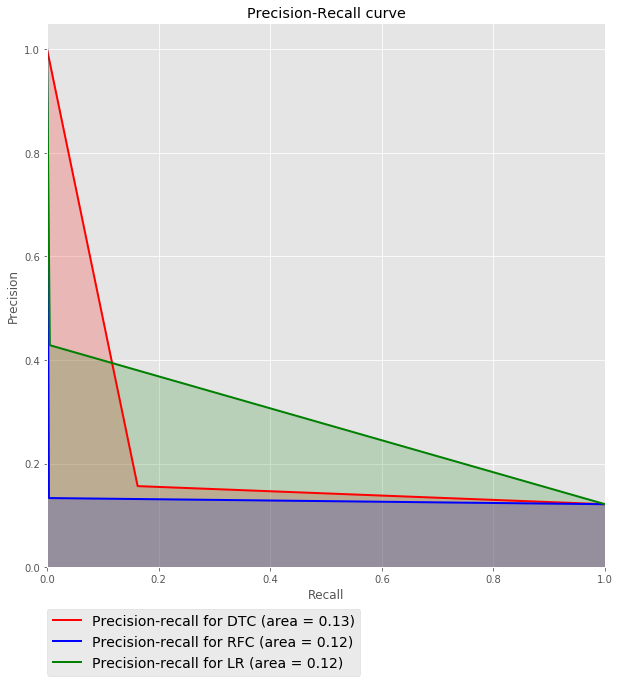

In [87]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
#import matplotlib.colors

colors=["red", "blue", "green"]
lines = []
labels = []

plt.figure(figsize=(10, 10))


#Plot precision? recall fo DTC
precision, recall, thresholds = precision_recall_curve(y_test, predict_DTC)
average_precision_DTC = average_precision_score(y_test, predict_DTC)
l, = plt.plot(recall, precision, color=colors[0], lw=2)
plt.fill_between(recall, precision, alpha=0.2, color=colors[0])
lines.append(l)
labels.append('Precision-recall for DTC (area = {0:0.2f})'.format(average_precision_DTC))

#Plot precision? recall fo RFC
precision, recall, thresholds = precision_recall_curve(y_test, predict_RFC)
average_precision_RFC = average_precision_score(y_test, predict_RFC)
l, = plt.plot(recall, precision, color=colors[1], lw=2)
plt.fill_between(recall, precision, alpha=0.2, color=colors[1])
lines.append(l)
labels.append('Precision-recall for RFC (area = {0:0.2f})'.format(average_precision_RFC))

#Plot precision? recall fo LR
precision, recall, thresholds = precision_recall_curve(y_test, predict_LR)
average_precision_LR = average_precision_score(y_test, predict_LR)
l, = plt.plot(recall, precision, color=colors[2], lw=2)
plt.fill_between(recall, precision, alpha=0.2, color=colors[2])
lines.append(l)
labels.append('Precision-recall for LR (area = {0:0.2f})'.format(average_precision_LR))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(lines, labels, loc=(0, -0.2), prop=dict(size=14))

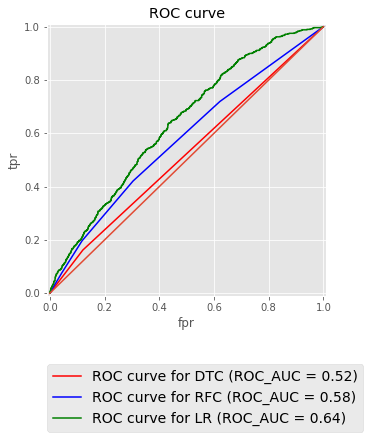

In [88]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here

from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(5, 5))

colors=["red", "blue", "green"]
lines = []
labels = []

fpr, tpr, thresholds = roc_curve(y_test, predict_proba_DTC[:,1])
l, = plt.plot(fpr, tpr, color=colors[0])
lines.append(l)
labels.append('ROC curve for DTC (ROC_AUC = {0:0.2f})'.format(roc_auc_score(y_test, predict_proba_DTC[:,1])))


fpr, tpr, thresholds = roc_curve(y_test, predict_proba_RFC[:,1])
l, = plt.plot(fpr, tpr, color=colors[1])
lines.append(l)
labels.append('ROC curve for RFC (ROC_AUC = {0:0.2f})'.format(roc_auc_score(y_test, predict_proba_RFC[:,1])))

fpr, tpr, thresholds = roc_curve(y_test, predict_proba_LR[:,1])
l, = plt.plot(fpr, tpr, color=colors[2])
lines.append(l)
labels.append('ROC curve for LR (ROC_AUC = {0:0.2f})'.format(roc_auc_score(y_test, predict_proba_LR[:,1])))

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

plt.legend(lines, labels, loc=(0, -0.5), prop=dict(size=14))

In [95]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here

model_DTC = DecisionTreeClassifier()
ROC_AUC_DTC = cross_val_score(model_DTC, X, y, scoring='roc_auc', cv=10)
print('Средний ROC AUC for DTC: ', ROC_AUC_DTC.mean())

model_RFC = RandomForestClassifier()
ROC_AUC_RFC = cross_val_score(model_RFC, X, y, scoring='roc_auc', cv=10)
print('Средний ROC AUC for RFC: ', ROC_AUC_RFC.mean())

model_LR = LogisticRegression()
ROC_AUC_LR = cross_val_score(model_LR, X, y, scoring='roc_auc', cv=10)
print('Средний ROC AUC for LR: ', ROC_AUC_LR.mean())

Средний ROC AUC for DTC:  0.5230888549771147
Средний ROC AUC for RFC:  0.5730649519344864
Средний ROC AUC for LR:  0.625009669009507


In [98]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

# Лучшей показала себя модель LogisticRegression

#predict = 
## Your Code Here

#Ранее учились и проверяли на тренировочной выборке df_train_preproc
#Теперь меняем/определяем X,y от набора данных df_train_preproc, X_test, y_test от набора данных df_test_preproc
X = df_train_preproc.drop('TARGET', axis=1)
X_test = df_test_preproc.drop('TARGET', axis=1)
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

#задаем модель, переобучаем на df_train_preproc, предсказываем на df_test_preproc
model_LR = LogisticRegression() 
model_LR.fit(X, y)                                  
predict_LR = model_LR.predict(X_test)               
predict_proba_LR = model_LR.predict_proba(X_test)

ROC AUC for Logistic Regression model = 0.68


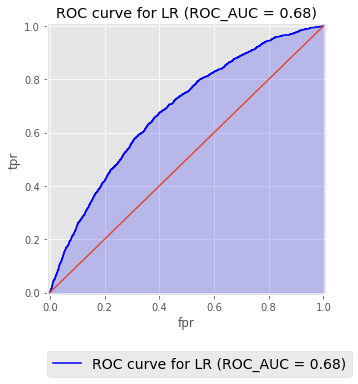

In [109]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here

lines = []
labels = []


plt.figure(figsize=(5, 5))

fpr, tpr, thresholds = roc_curve(y_test, predict_proba_LR[:,1])
l, = plt.plot(fpr, tpr, color='b')
plt.fill_between(fpr, tpr, alpha=0.2, color='b')
lines.append(l)
labels.append('ROC curve for LR (ROC_AUC = {0:0.2f})'.format(roc_auc_score(y_test, predict_proba_LR[:,1])))

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve for LR (ROC_AUC = {0:0.2f})'.format(roc_auc_score(y_test, predict_proba_LR[:,1])))
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

plt.legend(lines, labels, loc=(0, -0.3), prop=dict(size=14))


print('ROC AUC for Logistic Regression model = {0:0.2f}'.format(roc_auc_score(y_test, predict_proba_LR[:,1])))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [108]:
### И далее ;)

ROC_AUC_LR = cross_val_score(model_LR, X, y, scoring='roc_auc', cv=10)
print('ROC AUC for LR: ', ROC_AUC_LR)
print('\nСредний ROC AUC for LR: ', ROC_AUC_LR.mean())

ROC AUC for LR:  [0.65607753 0.61706452 0.69096617 0.63881576 0.6462976  0.58088917
 0.65945674 0.69601724 0.64311287 0.664961  ]

Средний ROC AUC for LR:  0.6493658605587511


Получилось так что точность модели на test выборке выше чем на тренировочной.